# Analysis of the synthetic calibration of the equilirium MD1 runs

## 50% parameter variance (corrected verions)

In [1]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

check the spread in the results w.r.t. targets

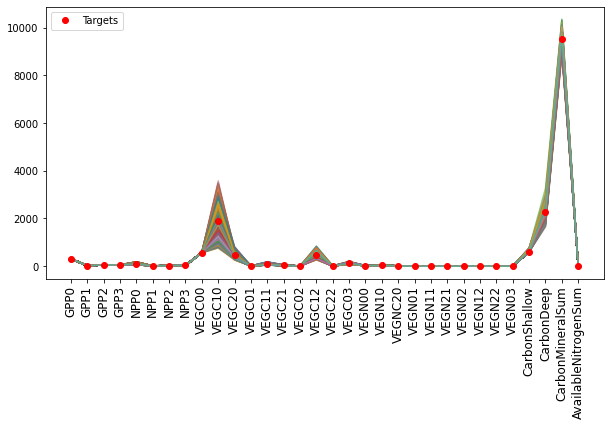

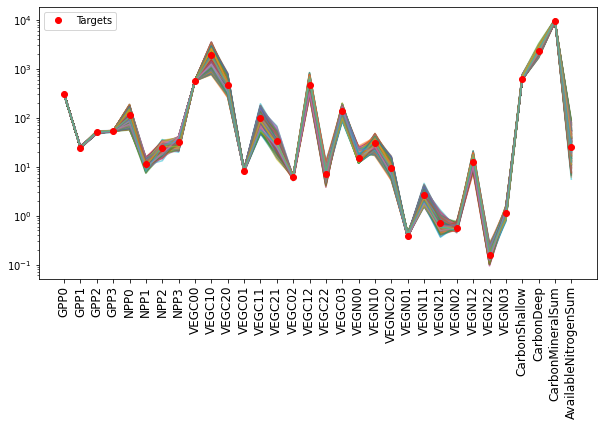

In [3]:
sa_path='20_percent/check_all-run/'
model='results.csv'

params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
#print(df_param.head())


model_header =  ['GPP0','GPP1','GPP2','GPP3',\
                 'NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03','CarbonShallow','CarbonDeep',\
                 'CarbonMineralSum','AvailableNitrogenSum'
                   ]
df_model.columns = model_header
df_model.head()

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22',
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22',\
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22',\
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'
               ]
df_param.columns = param_header

df_model.head()
df_param.head()

ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# Workflow:
## Above-ground
### (1) cmax -> GPP
### (2) nmax, krb -> NPP, VEGC
### (3) cfall -> NPP, VEGC
### (4) nfall -> NPP, VEGC,VEGN
## Below-ground
### (5) soil param -> NPP, VEGC,VEGN, SoilC

In [7]:
def par_value_minus_mean_box_plot(df_x,x_true):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)
    
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].set_ylabel('Modeled-Observed', fontsize=12)
            
    std_devs = np.std((xx-xx.iloc[-1]).iloc[:-1,:], axis=0)
    ax[1].bar(range(1, len(xx.columns) + 1), std_devs, tick_label=xx.columns)
    ax[1].set_xticks(range(1, len(xx.columns) + 1))
    ax[1].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    #ax[1].set_title("Standard Deviation of Parameters' Deviations", fontsize=14)
    #ax[1].set_xlabel('Parameter', fontsize=12)
    ax[1].set_ylabel('Standard Deviation', fontsize=12)


In [5]:
path='50_percent/csv/'
model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

,GPP0,GPP1,GPP2,GPP3
0,307.170085,24.609986,50.010009,52.869993
1,210.467487,16.014665,65.130233,111.422827
2,307.169993,24.609996,50.010018,52.869998
3,307.169995,24.610003,50.009995,52.870002
4,307.170058,24.609998,50.010008,52.869998
5,307.170004,24.609999,50.009999,52.869999
6,306.646041,39.100266,51.346214,53.665426
7,307.170227,24.610070,50.010140,52.870012
8,307.169935,24.610015,50.010013,52.870003
9,307.387886,24.472121,54.077520,52.786259


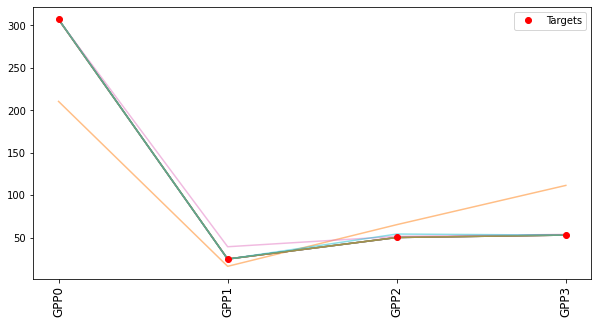

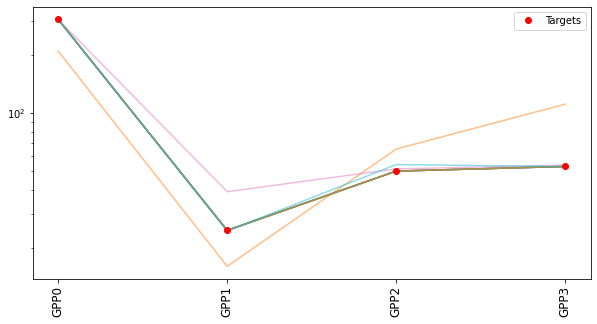

In [6]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

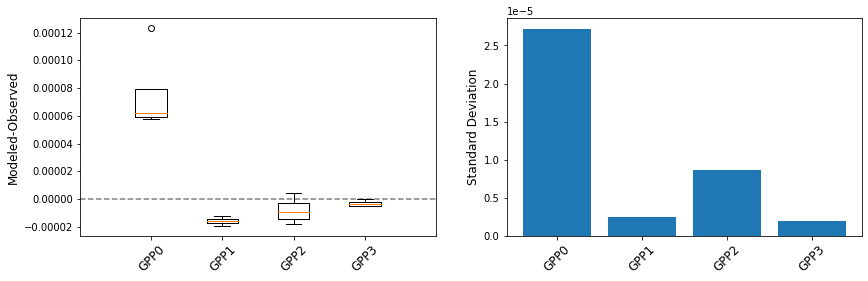

In [8]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

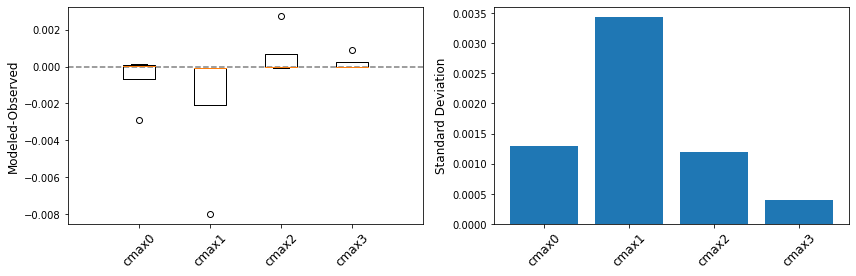

In [9]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cmax_true_params)

array([1.87390374e-09, 3.27057771e+03, 9.85855757e-11, 1.54808283e-11,
       8.72124195e-10, 4.01164003e-12, 5.31651305e+01, 1.90523598e-08,
       1.15281978e-09, 4.15455469e+00])

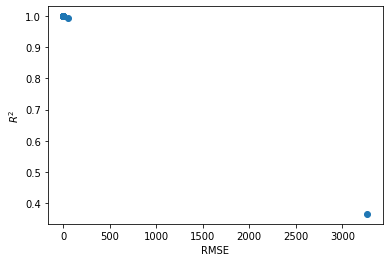

In [7]:
ut.plot_r2_rmse(df_model)

In [8]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,381.193126,113.937886,210.477276,93.309075,1.000000,1.873904e-09,2.927528e-07,1.000000
2,381.192977,113.937921,210.477289,93.309083,1.000000,9.858558e-11,1.486772e-07,1.000000
3,381.192973,113.937949,210.477203,93.309092,1.000000,1.548083e-11,6.471397e-08,1.000000
4,381.193058,113.937933,210.477264,93.309083,1.000000,8.721242e-10,1.183528e-07,1.000000
5,381.192985,113.937935,210.477223,93.309087,1.000000,4.011640e-12,2.367959e-08,1.000000
6,380.969228,176.675476,216.413488,94.686968,0.995771,5.316513e+01,1.032867e-01,0.869859
7,381.193293,113.938261,210.477788,93.309112,1.000000,1.905236e-08,1.655394e-06,0.999998
8,381.192914,113.938007,210.477272,93.309093,1.000000,1.152820e-09,2.827043e-07,1.000000
9,381.601245,113.350820,226.054100,93.162068,0.999685,4.154555e+00,2.078646e-02,0.975345


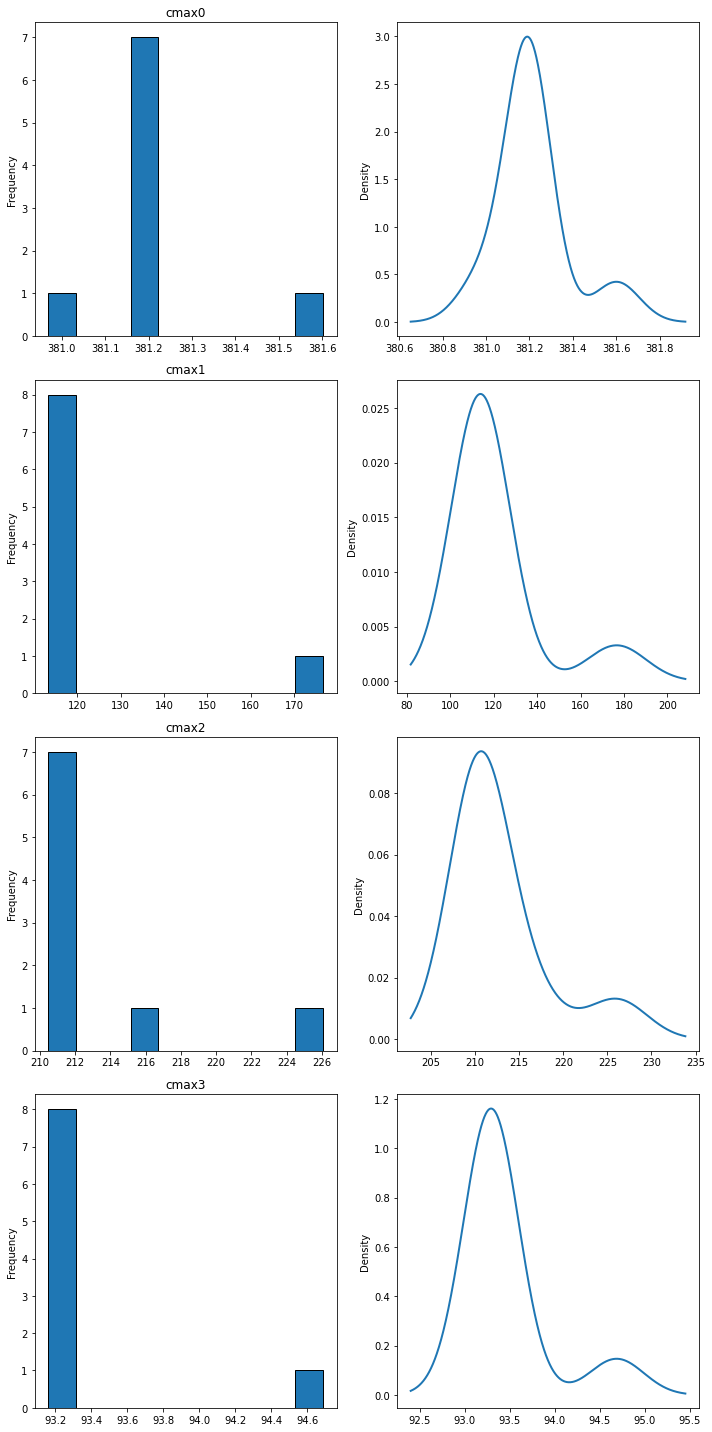

In [10]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [16]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
10.353518691062845 32.80641264873097
1.6312365275621445 5.314669125014228
1.2398698180913996 4.671998200141723
-4.724426740407942 13.234026078213727


,0
GPP0,0.315594
GPP1,0.306931
GPP2,0.265383
GPP3,-0.356991


In [17]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-3.2567978109909745e-06 9.154018302086402e-05
9.600520137098556e-06 9.193731675755287e-06
1.249313354634296e-05 2.296442278370029e-05
3.0517578082367436e-06 4.612965158458965e-06


,0
GPP0,-0.035578
GPP1,1.044246
GPP2,0.544021
GPP3,0.661561


In [9]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [10]:
df_model.iloc[-1]

GPP0    313.69
GPP1     24.76
GPP2     48.55
GPP3     55.07
Name: 10, dtype: float64

In [11]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,313.688303,24.759414,48.549932,55.070333,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,313.687196,24.755589,48.540452,55.063704,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,313.690325,24.768076,48.535881,55.075314,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,313.688549,24.775684,48.550938,55.062689,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,313.690085,24.778998,48.545574,55.080085,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,313.692423,24.784893,48.571340,55.064499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,313.652929,24.762385,48.552882,55.071918,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,313.790861,19.704034,51.555334,55.058247,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,303.412512,25.322847,48.312276,64.837560,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,293.076330,42.969787,72.551736,96.444225,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [12]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


## (2) nmax, krb -> NPP, VEGC

In [11]:
model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,111.954258,10.448142,25.595893,32.544188,571.760309,1896.681812,473.485410,7.449266,97.411056,11.643023,5.623472,527.795032,7.185996,137.103589
1,111.314264,11.313353,22.999745,32.135692,569.847302,1894.034753,473.662518,8.525928,98.951023,33.236133,5.829793,477.694687,8.321530,135.821870
2,111.605749,11.346535,22.400701,27.167217,572.005695,1892.833679,477.422418,8.585308,101.633089,25.399175,6.068692,473.531378,6.962607,115.429301
3,112.989374,11.278233,22.718333,32.401869,570.851440,1894.002234,474.068646,8.297497,98.687772,32.391731,5.570379,469.261267,6.796458,136.551099
4,113.137523,11.240596,24.033960,32.449468,570.636133,1894.094153,474.106702,8.080365,99.291384,31.976853,5.503392,477.940121,6.562924,136.575555


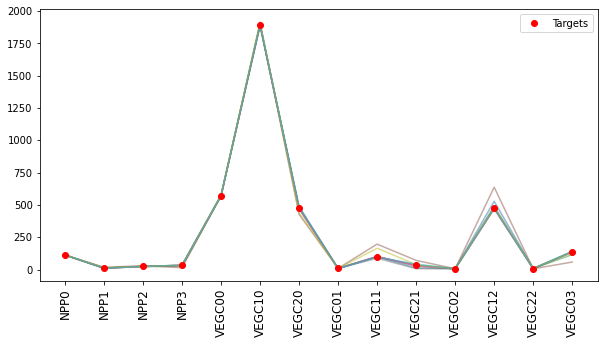

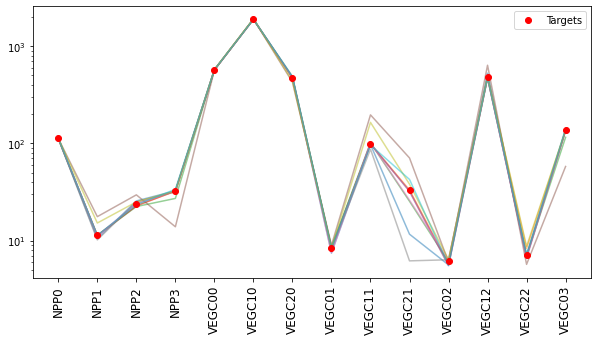

In [12]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

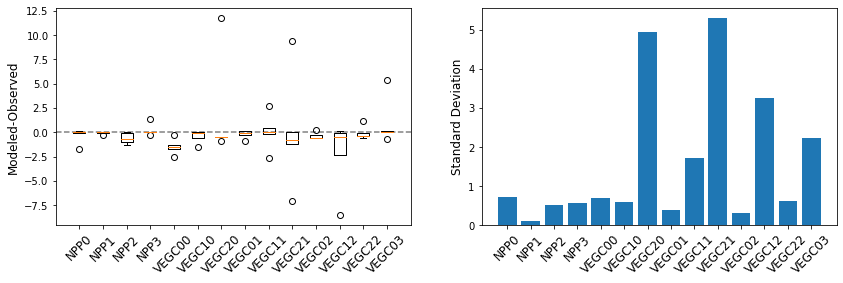

In [13]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

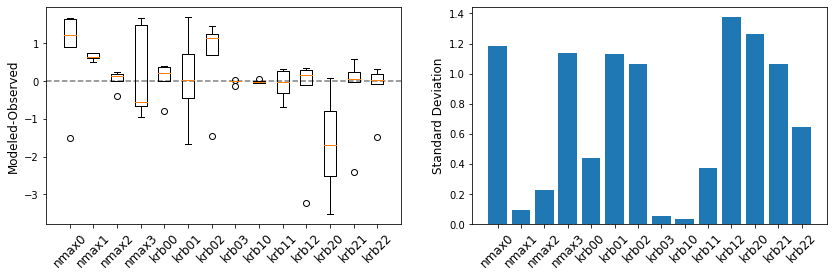

In [14]:
nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nmax_krb_true_params)

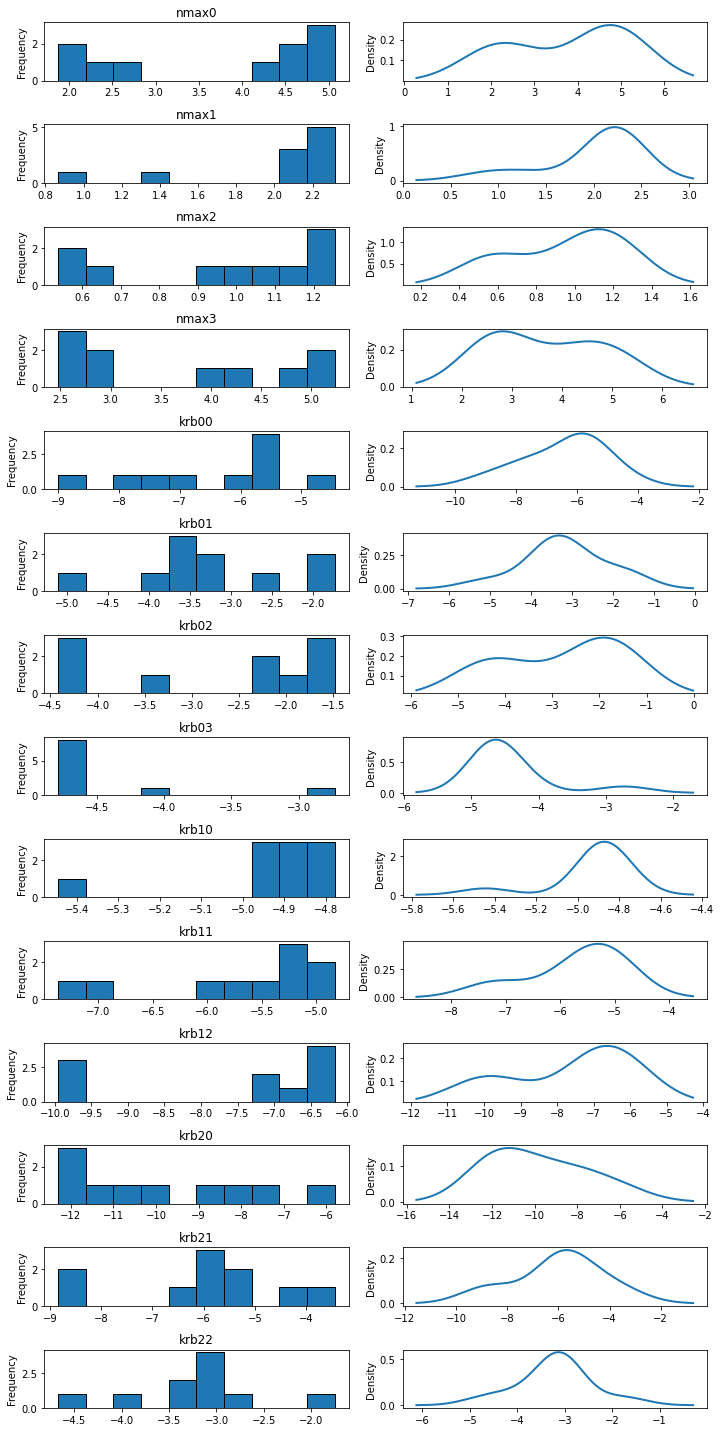

In [12]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [22]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,2.706250,1.845434,0.989943,4.007583,-6.341983,-3.066330,-2.675072,-4.649381,-4.857358,-5.321711,-6.705722,-7.662135,-6.337571,-3.366974,1.000000,0.021576,0.004955,0.983664,0.000145,0.057600
8,4.052477,1.826903,0.878016,2.842614,-5.716555,-3.524217,-2.792056,-4.652611,-4.907957,-5.117818,-6.966432,-9.628113,-6.181219,-3.130366,1.000000,0.051173,0.003712,0.990980,0.000345,0.043151
4,2.816661,1.452113,0.824981,2.855537,-5.737933,-3.753665,-2.362486,-4.650596,-4.907898,-5.037220,-7.252648,-9.446338,-6.128077,-2.789940,1.000000,0.088815,0.014518,0.926389,0.000599,0.168755
5,3.008356,1.512406,1.065105,3.175150,-5.712105,-2.843005,-2.631581,-4.649055,-4.910332,-5.395128,-6.643325,-9.792439,-6.410702,-2.875147,1.000000,0.116045,0.012295,0.939558,0.000782,0.142919
0,3.619083,1.432544,1.071463,4.036615,-6.121976,-3.969859,-3.139001,-4.641786,-4.870697,-4.982540,-6.472593,-7.987146,-6.066339,-2.604856,0.999999,0.164988,0.013924,0.929679,0.001112,0.161848
6,3.414386,1.831279,0.877877,2.878537,-6.257009,-3.108941,-2.996233,-4.647235,-4.862404,-5.311023,-6.837877,-7.765332,-6.313937,-3.204757,0.999999,0.190158,0.002217,0.999431,0.001282,0.025801
7,3.482584,1.776941,1.050753,3.327326,-6.974379,-4.139375,-2.690260,-4.640696,-4.829043,-4.978555,-6.622893,-7.392776,-5.774794,-3.128831,0.999997,0.695333,0.010652,0.947405,0.004688,0.123905
1,3.921083,1.613430,1.009895,3.298249,-6.287208,-3.081710,-3.432009,-4.642658,-4.868409,-5.318010,-6.492563,-7.211914,-6.316046,-3.064257,0.999986,3.277991,0.005578,0.968955,0.022099,0.068504
9,3.775427,1.852955,1.130758,2.921571,-4.812039,-2.762772,-3.514012,-4.650397,-5.141707,-5.426144,-6.345401,-9.824342,-6.283131,-2.894536,0.999805,46.406977,0.017031,0.755048,0.312865,0.370235
3,3.052782,1.569906,0.853663,3.377429,-4.870080,-3.498287,-2.404117,-4.442150,-5.116969,-5.725024,-7.373112,-9.288911,-6.633012,-2.600844,0.999375,148.329260,0.086031,-0.000625,1.000000,1.414214


In [22]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 8, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,125.580390,12.793429,15.326373,33.632723,573.158899,2190.685522,491.687897,8.514133,125.270040,28.900563,5.900829,285.037122,4.307429,141.464497,0.989090,3380.062024,0.250666,0.801823,0.609458,1.012103
7,126.329923,14.898866,15.534038,34.054631,575.245398,2196.246802,483.095395,8.608280,158.164743,38.817181,5.773555,283.024622,5.133843,143.178674,0.988449,3580.002486,0.289446,0.551396,0.645509,1.134568
4,127.154478,13.449489,15.061625,29.018720,574.669812,2172.460229,509.615799,8.542675,132.016090,39.441954,5.753319,290.693567,5.192672,122.468439,0.988010,3662.547723,0.260144,0.685790,0.660396,1.067399
6,122.974161,12.972721,14.859367,28.441388,574.556946,2099.447192,505.609177,8.587996,126.434860,33.778658,5.865574,295.680685,5.067954,120.522717,0.984988,4301.757721,0.248912,0.594249,0.775670,1.116007
2,120.712354,12.393728,15.149317,27.358802,572.466852,2110.741626,493.759131,8.603640,119.603032,26.488630,6.088407,313.743954,4.665521,116.363651,0.983859,4676.403420,0.231453,0.598354,0.843220,1.125913
5,123.744772,7.931872,15.932692,27.734286,573.579565,2163.048999,496.756696,8.227026,45.621423,20.291812,5.949596,325.862552,5.970871,117.850917,0.984414,4771.069330,0.310219,0.163438,0.860274,1.319117
3,126.523045,10.230776,16.008694,27.719906,574.733386,2223.613403,507.382498,8.520005,82.022469,24.489495,6.038845,329.093185,4.553992,117.441246,0.984903,4855.087193,0.215006,0.644540,0.875409,1.116556
0,126.371477,9.563146,17.564974,28.983174,576.759540,2136.016699,521.581738,8.359118,72.370496,17.869718,5.934474,341.713547,6.350367,122.319941,0.981439,5546.901519,0.264426,0.221914,1.000172,1.314118


## (3) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [15]:
model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,118.061032,11.696712,23.811647,33.988587,575.922815,1894.414807,474.351175,9.173225,98.859377,32.938808,6.250165,477.851624,5.235990,136.238187
1,116.263141,11.516707,24.733996,33.475638,575.517102,1893.790674,474.442300,8.020245,98.840267,33.321586,5.894878,478.246982,5.665087,137.589362
2,114.259016,11.360047,21.221357,32.907664,573.058405,1894.180786,474.516199,7.928048,99.058225,33.272515,6.374586,476.861810,7.874619,136.857701
3,113.337448,11.287988,23.571011,32.436814,572.599152,1894.053101,474.562701,8.003268,98.914365,33.211482,6.522669,477.848444,7.179265,136.483945
4,113.303186,11.302541,23.673536,32.441822,572.512061,1894.146362,474.535706,8.278609,98.900607,33.208518,6.616608,477.734790,6.914120,136.523831


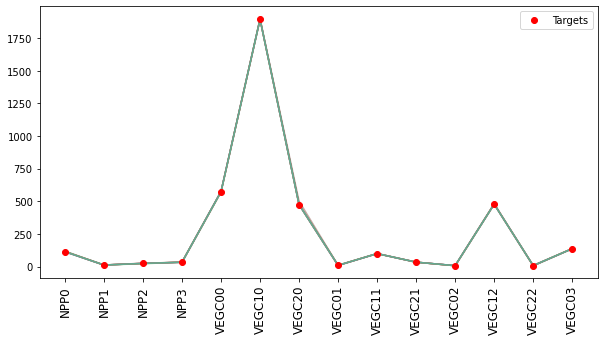

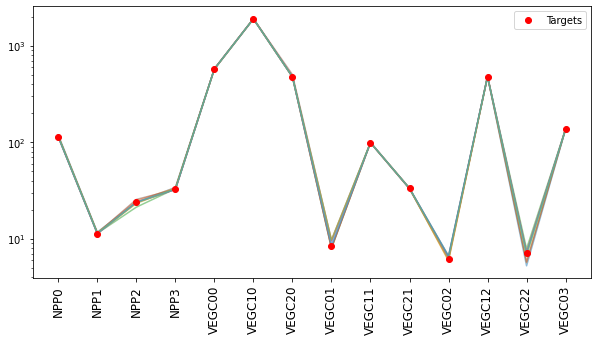

In [16]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [15]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
0.0011, 0.0507, 0.0250, 0.0199, 0.0034, 0.0058, 0.0036, 0.0052, 0.0012, 0.0260]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cfall00,cfall01,cfall02,cfall03,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
6,0.001288,0.039001,0.023104,0.019955,0.003369,0.005559,0.003604,0.005104,0.001383,0.026954,1.000000,0.030952,0.007561,1.000000,0.000563,0.169300
4,0.001454,0.052776,0.012522,0.019941,0.003325,0.004663,0.003664,0.005056,0.001139,0.028233,1.000000,0.036451,0.009761,0.970295,0.000663,0.218569
9,0.001587,0.049285,0.012907,0.019955,0.003287,0.004869,0.003669,0.005013,0.001193,0.028524,1.000000,0.037627,0.009893,0.968499,0.000685,0.221534
3,0.001601,0.058770,0.015275,0.019942,0.003284,0.004292,0.003610,0.005010,0.001036,0.026576,1.000000,0.042823,0.009161,0.978321,0.000779,0.205139
7,0.001608,0.025990,0.012755,0.019981,0.003286,0.006501,0.003668,0.005012,0.001631,0.027107,0.999999,0.169814,0.017241,0.868259,0.003089,0.386086
8,0.001121,0.025361,0.029807,0.020501,0.003527,0.006754,0.003645,0.005289,0.001695,0.028026,0.999997,0.633709,0.024562,0.765364,0.011529,0.550126
2,0.000599,0.063024,0.018457,0.020347,0.003629,0.004155,0.003504,0.005404,0.000985,0.021065,0.999996,0.837710,0.025132,0.755826,0.015241,0.562971
1,0.000558,0.060156,0.031338,0.020383,0.003595,0.004285,0.003661,0.005370,0.001012,0.035854,0.999992,1.829737,0.033871,0.629004,0.033289,0.759189
0,0.000571,0.034934,0.021692,0.020894,0.003659,0.006075,0.003646,0.005444,0.001510,0.038916,0.999987,3.212386,0.044658,0.471030,0.058443,1.001706
5,0.001240,0.027166,0.025817,0.019913,0.003347,0.006487,0.003696,0.004821,0.001643,0.037016,0.999771,54.965754,0.038154,0.087432,1.000000,1.315268


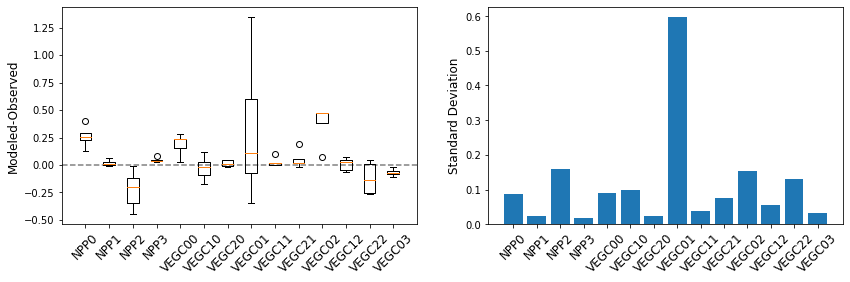

In [17]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

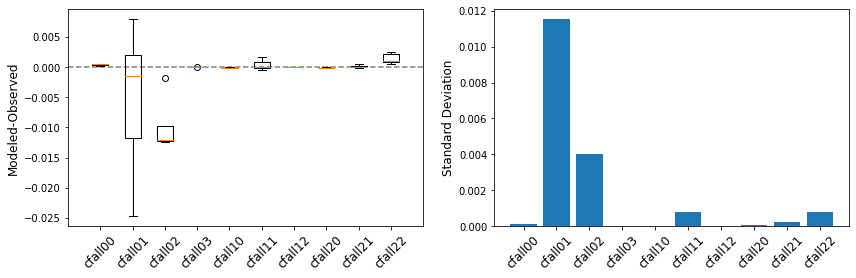

In [18]:
cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                     0.003590, 0.005149, 0.001171, 0.026025]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cfall_true_params)

In [26]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 10, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,99.594647,12.218951,22.899020,34.057497,572.782892,2079.693848,453.798157,8.100175,84.510884,28.648086,5.937924,413.582184,6.609915,120.896177,0.967477,9185.196700,0.251380,0.967477,0.880374,1.235290
9,102.432001,11.850358,22.334117,32.797152,572.813348,2064.325122,432.196719,8.661872,90.539312,32.617214,6.164519,408.375522,7.097297,132.988527,0.966518,9283.971508,0.271264,0.670385,0.889864,1.290826
2,101.650939,11.163938,23.954819,34.127104,575.429834,2062.055542,455.504056,8.506852,100.957644,33.338014,6.236520,410.491437,8.509895,120.869567,0.966301,9342.760478,0.270356,0.658480,0.895499,1.292457
7,101.124369,12.364594,25.057279,33.964557,575.100708,2067.806909,465.357578,7.914812,82.750988,29.554984,6.004516,413.701678,6.433296,122.117027,0.966500,9368.411178,0.255802,0.836407,0.897947,1.258508
0,102.259958,11.985806,23.592392,33.245597,571.829205,2054.950940,435.581464,7.959580,88.572072,29.940660,5.939912,409.239594,7.551089,128.841411,0.965561,9475.366553,0.260150,0.736721,0.908219,1.276343
4,100.521898,12.036281,25.114868,34.141682,575.661920,2074.714307,467.680228,8.020004,86.922916,32.501416,5.913951,420.257639,6.521413,120.404013,0.965982,9574.752333,0.254799,0.766643,0.917716,1.270297
3,102.733409,11.063628,25.070401,32.944906,575.990210,2069.141382,465.147040,8.781829,103.014106,32.518117,6.211402,423.404477,8.892334,131.685808,0.964719,9852.110324,0.273732,0.410400,0.944310,1.334946
6,102.838611,11.658417,25.588681,33.635469,576.258893,2053.607202,485.673734,8.893580,90.570090,41.480253,5.959941,419.803256,8.572201,125.327673,0.963913,9956.786266,0.280047,0.286349,0.954360,1.357466
8,108.085187,12.770794,24.756590,34.328219,574.150684,2052.319873,383.771555,8.325493,80.815766,35.564850,5.891396,416.272855,8.659529,132.948828,0.962236,10322.963495,0.290098,0.009021,0.989471,1.406788
5,108.193313,12.247159,24.918865,35.121955,574.996063,2039.191138,425.762027,8.150058,89.397984,33.641962,6.067333,421.596115,6.780119,125.675711,0.961472,10440.415783,0.268623,0.238794,1.000742,1.363419


## (4) nfall -> NPP, VEGC, VEGN 

In [19]:
model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,114.523835,11.360852,22.776432,32.412956,574.043237,1893.555823,475.236163,8.383968,98.561672,32.831107,...,14.821149,30.187298,9.522931,0.386902,2.587949,0.707726,0.574768,12.484229,0.151996,1.147803
1,113.079333,11.296428,23.664846,32.414167,572.397217,1894.105457,474.563464,8.346251,98.891861,33.189116,...,14.790977,30.263514,9.510386,0.385117,2.601483,0.715756,0.573125,12.532902,0.154427,1.148623
2,113.096447,11.300991,24.417245,32.416379,572.125165,1893.759045,474.489993,8.343635,98.916553,33.193090,...,14.784631,30.257541,9.508902,0.384997,2.602003,0.715831,0.572023,12.522818,0.158221,1.148656
3,113.105909,11.299973,24.004899,32.415390,572.274554,1893.958374,474.529025,8.343858,98.891376,33.189488,...,14.788264,30.261368,9.509697,0.385009,2.601422,0.715767,0.572798,12.530532,0.156273,1.148623
4,114.506126,11.361720,22.849405,32.413844,573.980585,1893.414575,475.196194,8.382609,98.571736,32.840661,...,14.819949,30.186107,9.522136,0.386840,2.588198,0.707982,0.574742,12.504847,0.152439,1.147826


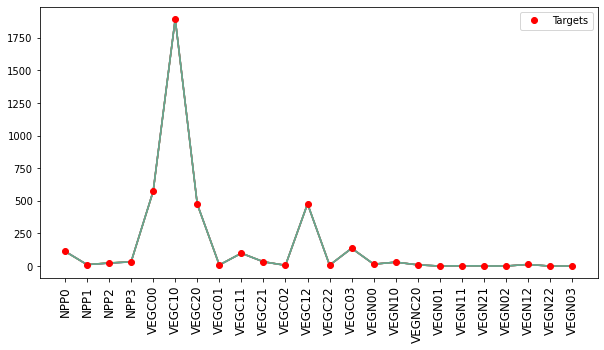

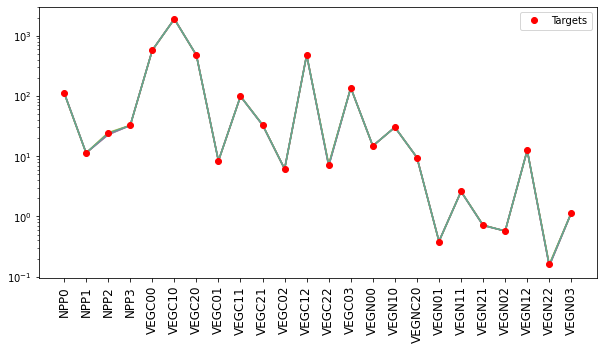

In [20]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

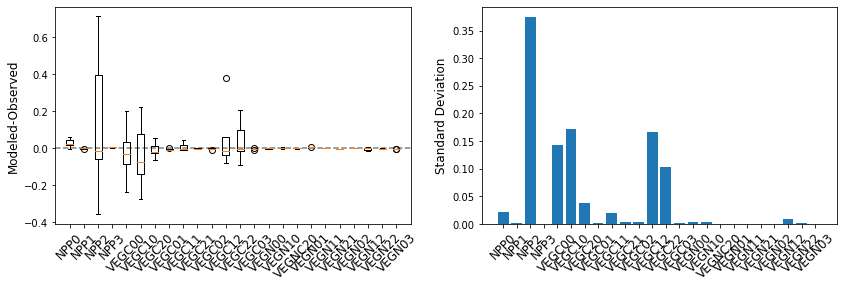

In [21]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

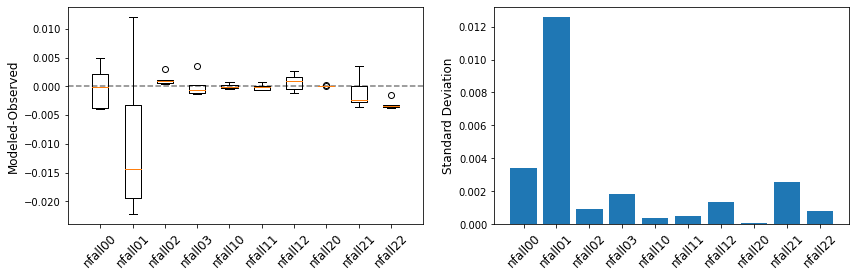

In [22]:
nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                     0.005220, 0.003280, 0.007283, 0.007607]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nfall_true_params)

## (5) soil param -> NPP, VEGC,VEGN, SoilC

In [36]:
model='out-csoil-md1-r-EJ-50.finalresults.csv'
params='param-csoil-md1-r-EJ-50.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,602.504535,1140.834619,4662.078517,11.921107
1,599.283112,1137.276138,4673.307735,16.295045
2,600.864684,1142.368768,4650.913100,8.506192
3,543.473942,1678.313144,3231.102370,8.253666
4,606.817526,1141.393376,4685.356192,1.179715


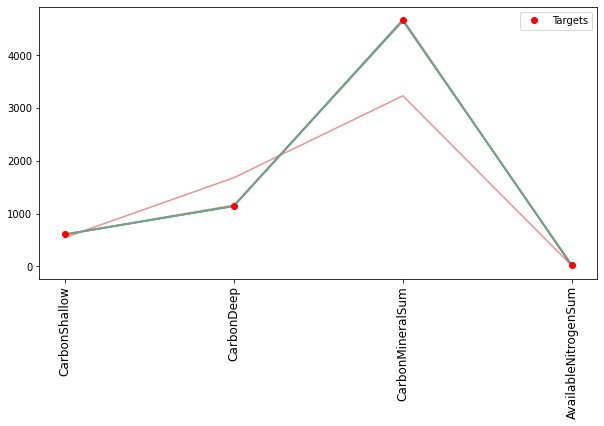

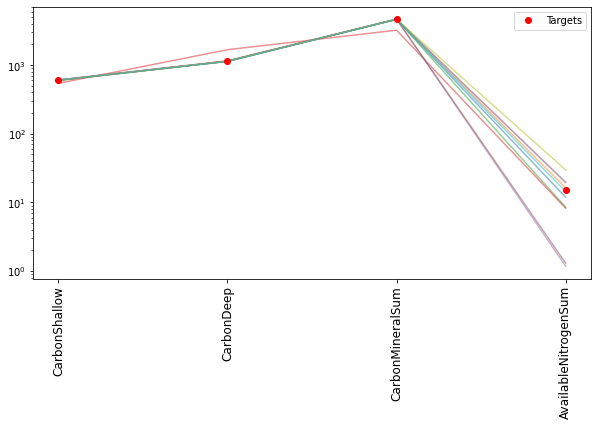

In [37]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

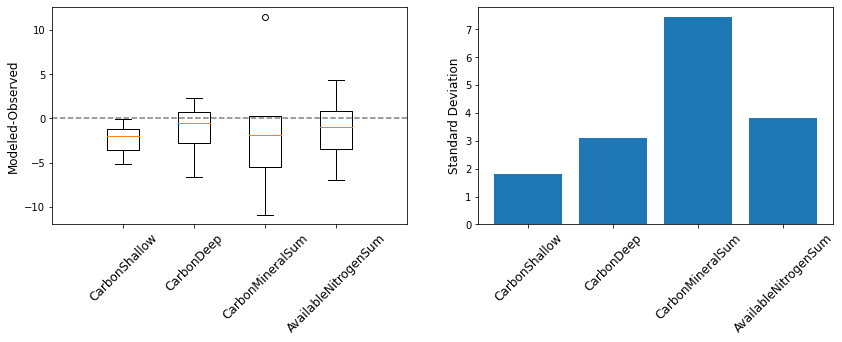

In [38]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

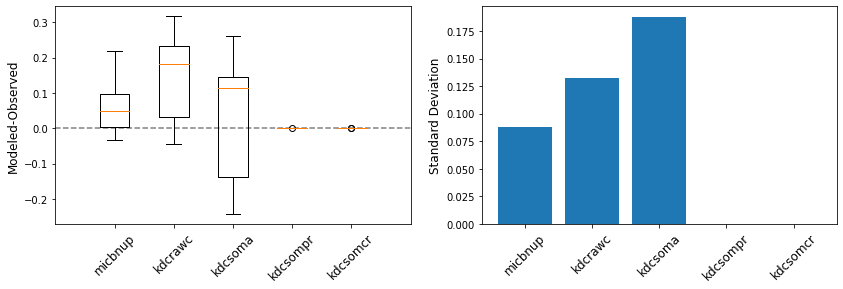

In [39]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,true_params)

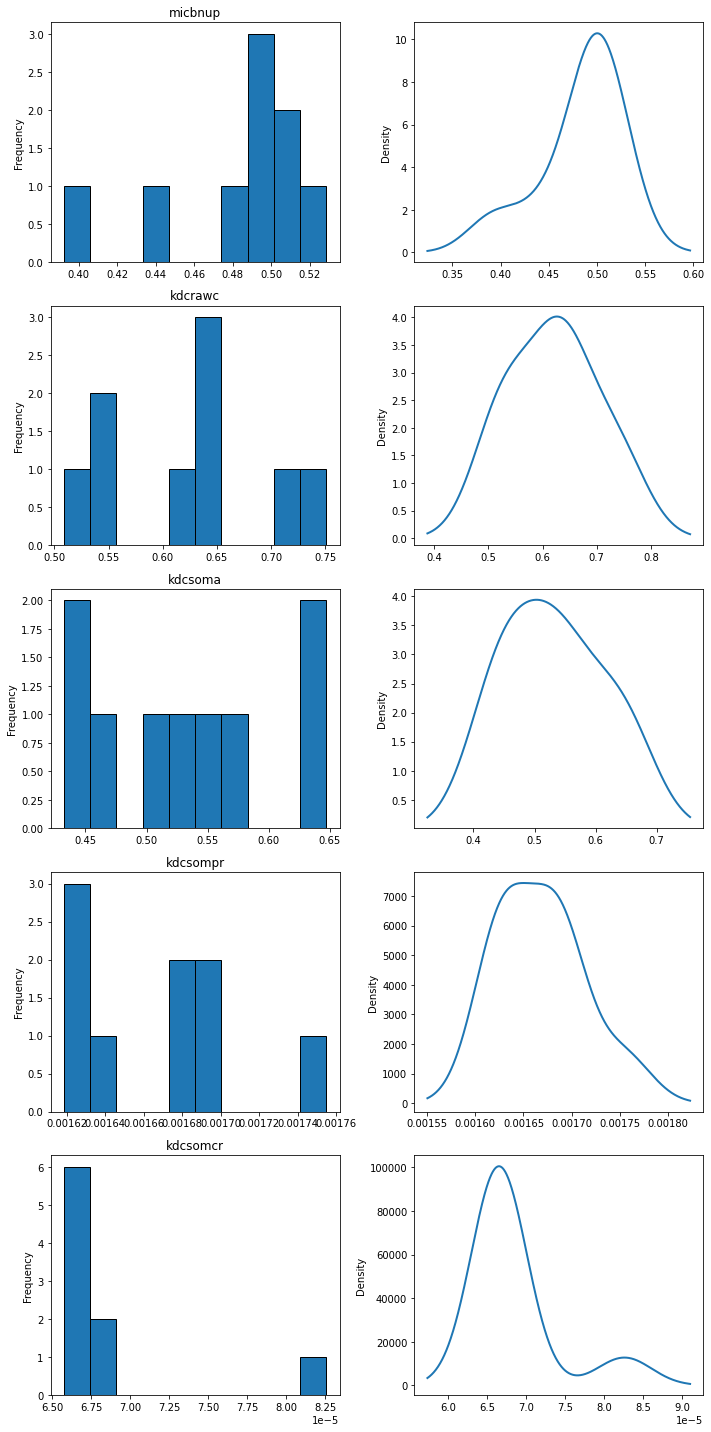

In [31]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959


In [33]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,608.499008,1418.548373,4958.589688,6.822821,0.999999,2.227857,0.015386,0.991239,0.000009,0.040262
8,608.644507,1417.199289,4957.869374,6.394271,0.999999,2.301288,0.033206,0.967371,0.000010,0.086895
6,608.353938,1415.492766,4958.814486,6.876120,0.999999,4.772612,0.013921,0.993195,0.000020,0.036430
3,608.075121,1418.457418,4960.892654,8.106103,0.999998,5.598279,0.029115,0.972842,0.000024,0.076190
4,609.604491,1405.590850,4947.272277,2.867218,0.999980,73.011569,0.382140,0.499831,0.000308,1.000000
1,609.389684,1410.939118,4932.388559,7.055476,0.999953,172.695824,0.008846,0.999594,0.000728,0.023159
9,607.256859,1406.359613,4982.346452,11.447897,0.999946,199.478153,0.097591,0.880664,0.000841,0.255381
7,609.548701,1387.974215,4975.284602,3.645329,0.999915,315.471562,0.251553,0.674168,0.001331,0.658274
2,584.040606,1325.483622,4020.799382,11.743201,0.906037,221703.853922,0.183933,0.204932,0.937897,1.054193
0,579.845907,1338.587975,3986.518932,19.266232,0.897226,237579.235365,0.245793,0.079853,1.005267,1.193428


In [34]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748


In [35]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 